In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

### Генерація даних для CNN

In [55]:
# Генерація простих даних
def generate_data(num_samples, num_features):
    X = np.random.rand(num_samples, num_features, num_features, 1)  # Зображення 2D
    y = np.random.rand(num_samples, 1)  # Мітки
    return X, y

num_samples = 1000
num_features = 32
X, y = generate_data(num_samples, num_features)

# Нормалізація
scaler = MinMaxScaler()
y_scaled = scaler.fit_transform(y)

# Розбиття на тренувальні та тестові дані
X_train, X_test, y_train, y_test = train_test_split(X, y_scaled, test_size=0.2, random_state=0)

### Розробка CNN моделі для регресії

In [56]:
# Створення моделі
model_cnn = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(num_features, num_features, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1)
])

model_cnn.compile(optimizer='adam', loss='mse')

c:\Users\qizixxx\Documents\UNIC\2 course\dubov\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [57]:
# Тренування моделі
history_cnn = model_cnn.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.1622 - val_loss: 0.0818
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0805 - val_loss: 0.0837
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0812 - val_loss: 0.0863
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0819 - val_loss: 0.0822
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0860 - val_loss: 0.0813
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0867 - val_loss: 0.0949
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0759 - val_loss: 0.0855
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0695 - val_loss: 0.0810
Epoch 9/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0725 - val_loss: 0.0809
Epoch 10/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0629 - val_loss: 0.0828


In [58]:
# Оцінка моделі
loss = model_cnn.evaluate(X_test, y_test)
print(f'Test loss: {loss}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0807 
Test loss: 0.08390123397111893


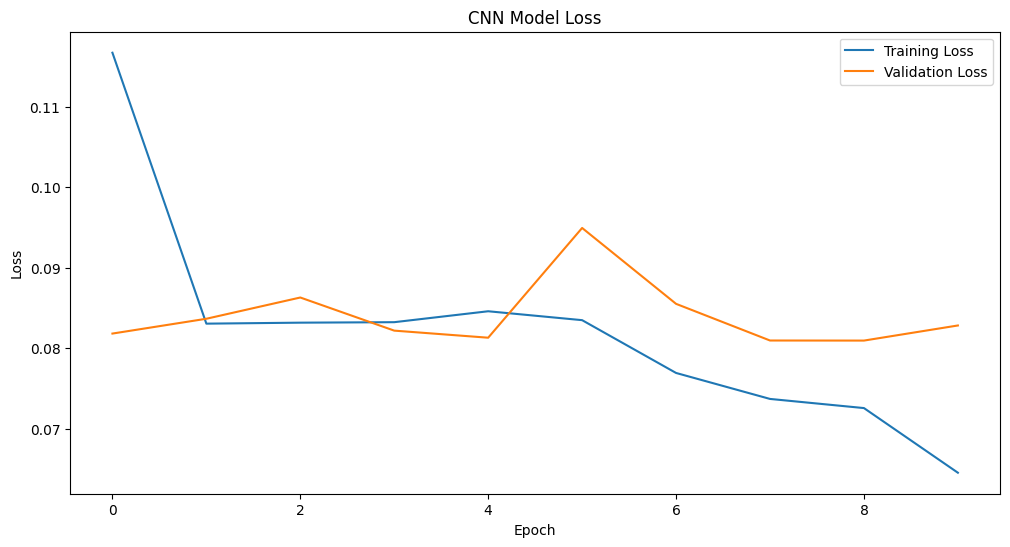

In [59]:
# Візуалізація втрат
plt.figure(figsize=(12, 6))
plt.plot(history_cnn.history['loss'], label='Training Loss')
plt.plot(history_cnn.history['val_loss'], label='Validation Loss')
plt.title('CNN Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Візуалізація результатів

In [60]:
# Прогнозування
y_pred = model_cnn.predict(X_test)
y_pred_inverse = scaler.inverse_transform(y_pred)
y_test_inverse = scaler.inverse_transform(y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


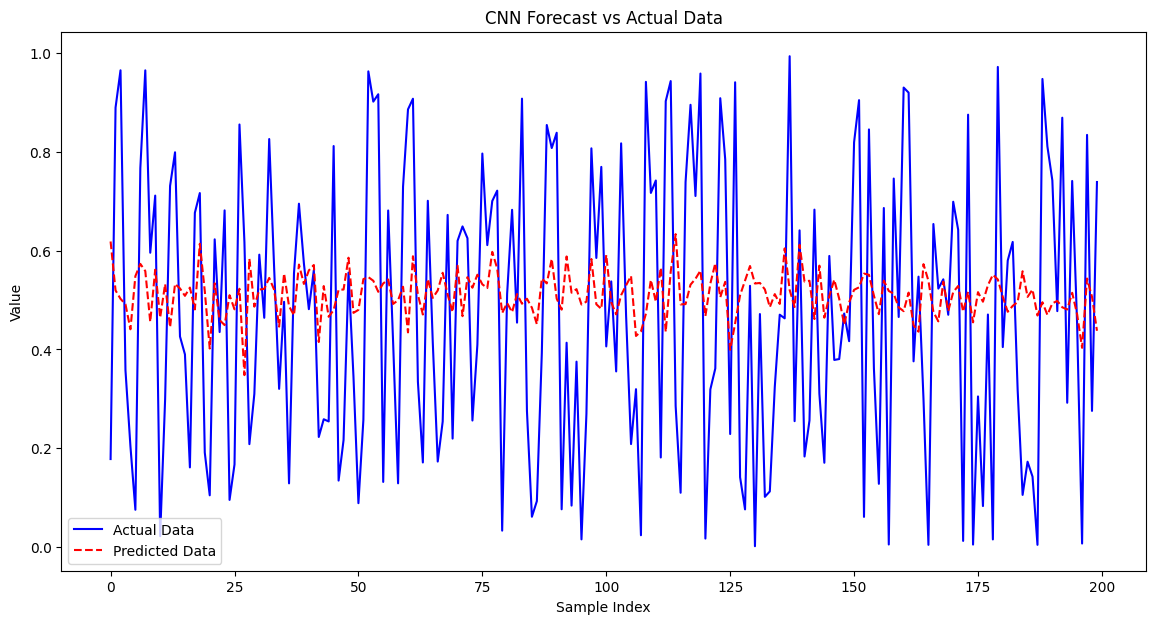

In [61]:
# Візуалізація
plt.figure(figsize=(14, 7))
plt.plot(y_test_inverse, label='Actual Data', color='blue')
plt.plot(y_pred_inverse, label='Predicted Data', linestyle='--', color='red')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('CNN Forecast vs Actual Data')
plt.legend()
plt.show()